In [1]:
import import_ipynb
from util import *
from util_genetic import *

importing Jupyter notebook from util.ipynb
importing Jupyter notebook from util_genetic.ipynb


# Paramètres du programme

In [2]:

STUDENT_ID = 12007698         # Identifiant de l'étudiant 12021446 12007698
NB_PERSONS = 1000             # Nombre d'individus de la population
PROBA_MUTATION = 1            # Probabilité de mutation d'un gene
PROBA_CROSSOVER = 0.99        # Probabilité de croisement des deux parents
PROBA_ADD_GENE = 0.2          # Probabilité d'ajout d'un gene
PROBA_REMOVE_GENE = 0.2       # Probabilité de suppression d'un gene
ELITISM_RATE = 0.2            # Taux d'élitime : correspond au taux de la population à garder pour la génération suivante (les n meilleurs individus en terme de score)
TARGET_SCORE= 0.90            # Seuil du score à partir duquel on arrete le prgramme
MAX_GENERATIONS = 10000       # Seuil du nombre d'itération à partir duquelon arrete le programme
USED_PROBA = LINEAR_PROBA    # Type de proba utilisée pour le tirage aléatoire d'un individu LINEAR_PROBA  ou FITNESS_PROBA ou FITNESS2_PROBA



In [3]:
# Initialisation de la population
population = generate_population(NB_PERSONS)
idx_generation = 1
#score = 0
current_max = 0
score_history = []
# Nombre d'individus gardés d'office d'une génération à la suivante (on trie ceux ayant les meilleurs score)
nb_to_keep = int(NB_PERSONS*ELITISM_RATE)
# Nombre d'enfant à générer pour chaque nouvelle génération : population totale - nb d'individus gardés d'office d'une génération à l'autre
nb_children = NB_PERSONS - nb_to_keep


print("------ Begin nb_to_keep = ", nb_to_keep , " nb_children to produce = " , nb_children)
while idx_generation < MAX_GENERATIONS and 1*current_max < TARGET_SCORE :
    # Lancer l'évaluation de toute la population
    list_evaluation = evaluate_population(STUDENT_ID, population)
     # log de la population
    if(idx_generation%100==0):
        log_list_evaluation(list_evaluation)
    # Max et moyenne des scores
    current_max,current_avg = compute_global_score(list_evaluation)
    score_history.append((current_max,current_avg))
    print("generation", idx_generation ,"score max:",current_max, "score moyen:",current_avg, len(list_evaluation))

    # Ré-initialiser la population
    population = []
    # Garder ceux qui ont obetnu les meilleurs score (on ne les modifie pas)
    # Applicaiton de l'élitisme : on garde dans la population les meilleurs individus qui sont gardé de-facto
    best_elts = list_evaluation[:nb_to_keep]
    for evaluation in best_elts:
        #print("first_elts", toStr(individu), score)
        population.append(evaluation['person'])

    # Générer les enfants
    children = generate_children(list_evaluation, nb_children, PROBA_CROSSOVER, PROBA_MUTATION, PROBA_ADD_GENE, PROBA_REMOVE_GENE, USED_PROBA)
    population.extend(children)    
    idx_generation+=1


theBest = list_evaluation[0]
print("Identifiant:", STUDENT_ID)
print("Individu le plus proche",  evalToStr(theBest) )



------ Begin nb_to_keep =  200  nb_children to produce =  800
generation 1 score max: 0.677479 score moyen: 0.487500886 1000
generation 2 score max: 0.677479 score moyen: 0.517124816 1000
generation 3 score max: 0.704997 score moyen: 0.539190868 1000
generation 4 score max: 0.704997 score moyen: 0.557133608 1000
generation 5 score max: 0.721938 score moyen: 0.575869818 1000
generation 6 score max: 0.770095 score moyen: 0.591878862 1000
generation 7 score max: 0.770095 score moyen: 0.603656556 1000
generation 8 score max: 0.771088 score moyen: 0.620016688 1000
generation 9 score max: 0.785765 score moyen: 0.630347799 1000
generation 10 score max: 0.785765 score moyen: 0.641901436 1000
generation 11 score max: 0.785765 score moyen: 0.649540908 1000
generation 12 score max: 0.789415 score moyen: 0.656654325 1000
generation 13 score max: 0.789415 score moyen: 0.666097737 1000
generation 14 score max: 0.797252 score moyen: 0.670934702 1000
generation 15 score max: 0.818334 score moyen: 0.67

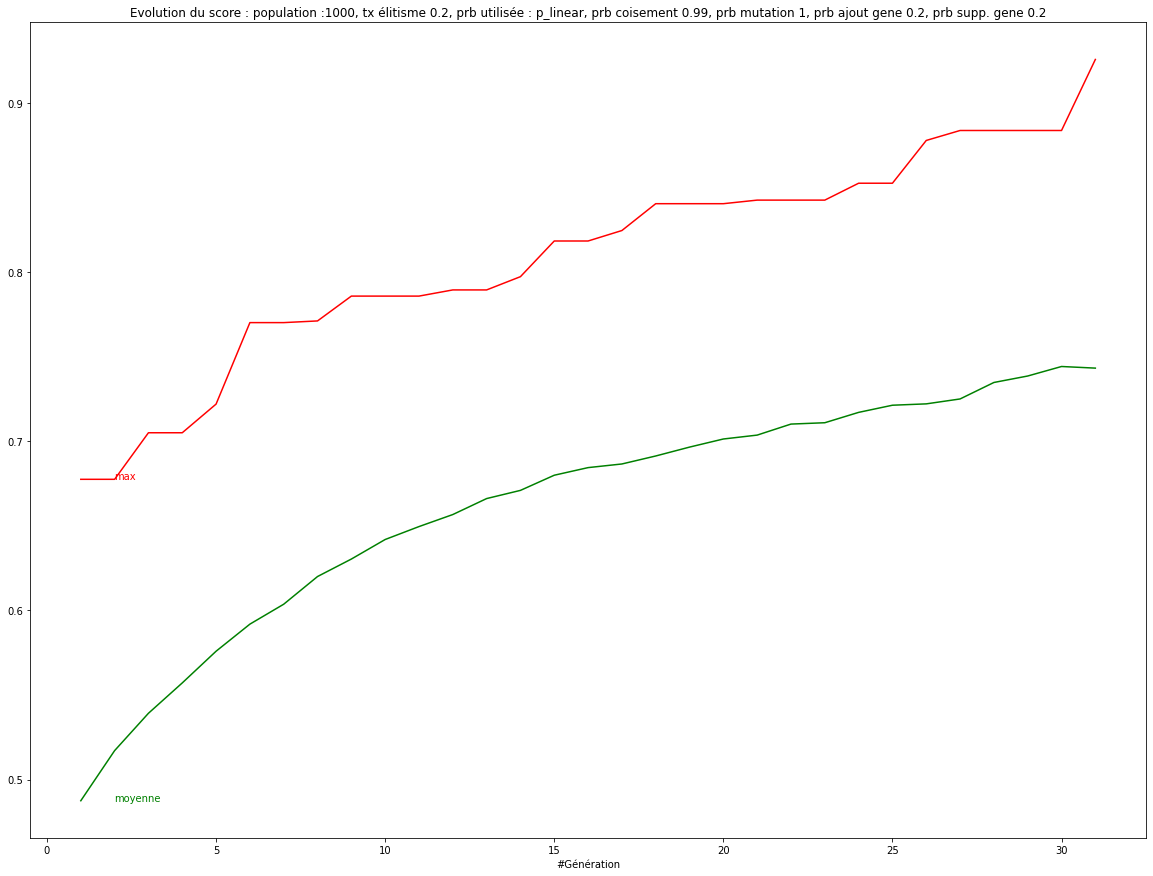

In [4]:

# Affichage des score max et moyens obtenus à chaque génération
display_history(score_history
    ,NB_PERSONS,ELITISM_RATE
    ,USED_PROBA
    ,PROBA_CROSSOVER
    ,PROBA_MUTATION
    ,PROBA_ADD_GENE
    ,PROBA_REMOVE_GENE)
